In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import requests
from lxml import html

import scipy.interpolate as interp

plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (8,6)

import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcm')
mpl.rcParams['axes.prop_cycle'] = cycler('color', \
                                         ['#1f77b4', '#ff7f0e', '#2ca02c', \
                                          '#d62728', '#9467bd', \
                                          (0.2,0.8,1.), '#bcbd22', '#17becf'])

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', \
                '#d62728', '#9467bd', \
                (0.2,0.8,1.), '#bcbd22', '#17becf']


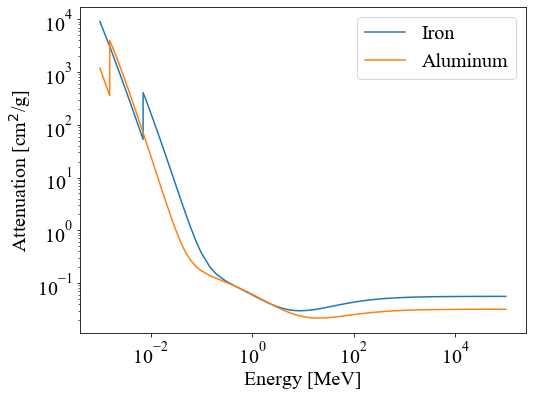

In [10]:
iron = np.genfromtxt('iron_attenuation.csv', skip_header=2)
alum = np.genfromtxt('al_attenuation.csv',skip_header=2)

plt.plot(iron[:,0],iron[:,1],label='Iron')
plt.plot(alum[:,0],alum[:,1],label='Aluminum')
plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Attenuation [cm$^2$/g]')
plt.xscale('log')
plt.yscale('log')



Text(0.5, 1.0, '2mm stainless sheet')

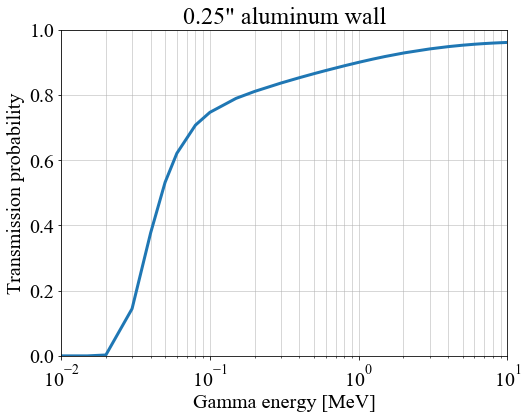

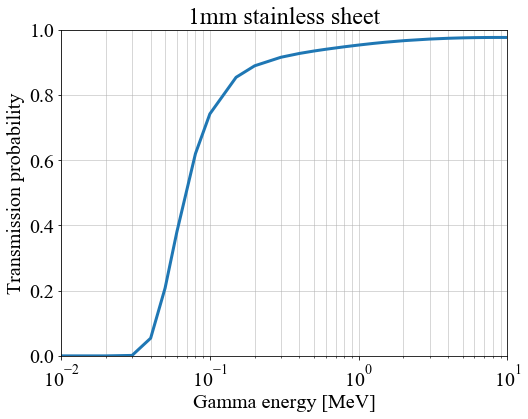

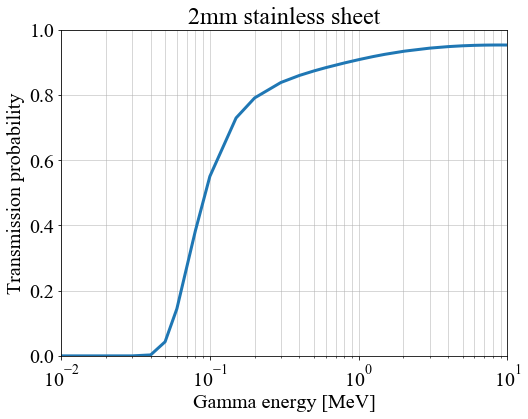

In [27]:
dens_al = 2.7 # g/cm^3
dens_stainless = 8.03 # g/cm^3

### Compute transmission probability for 0.25" thick aluminum
plt.figure(1)
al_atten = 1. / (dens_al * alum[:,1])
dist = 0.25 * 2.54
transmission_prob = np.exp( -dist / al_atten )
plt.plot( alum[:,0], transmission_prob, linewidth=3)
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.,1.)
plt.xlim(1.e-2, 10.)
plt.grid(which='both',linewidth=0.5)
plt.ylabel('Transmission probability')
plt.xlabel('Gamma energy [MeV]')
plt.title('0.25\" aluminum wall')



### Compute transmission probability for 1mm and 2mm thick stainless steel
plt.figure(2)
ss_atten = 1. / (dens_stainless * iron[:,1])
dist = 0.1
transmission_prob = np.exp( -dist / ss_atten )
plt.plot( iron[:,0], transmission_prob, linewidth=3)
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.,1.)
plt.xlim(1.e-2, 10.)
plt.grid(which='both',linewidth=0.5)
plt.ylabel('Transmission probability')
plt.xlabel('Gamma energy [MeV]')
plt.title('1mm stainless sheet')


plt.figure(3)
ss_atten = 1. / (dens_stainless * iron[:,1])
dist = 0.2
transmission_prob = np.exp( -dist / ss_atten )
plt.plot( iron[:,0], transmission_prob, linewidth=3)
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.,1.)
plt.xlim(1.e-2, 10.)
plt.grid(which='both',linewidth=0.5)
plt.ylabel('Transmission probability')
plt.xlabel('Gamma energy [MeV]')
plt.title('2mm stainless sheet')






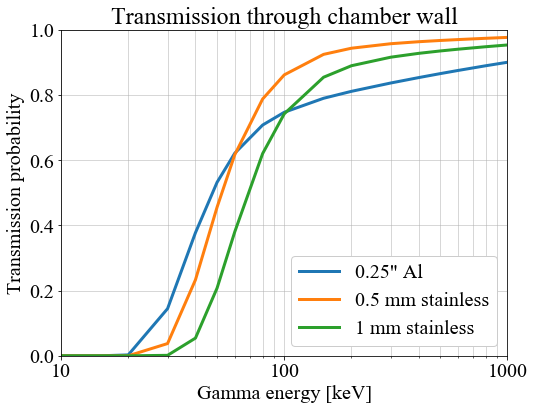

In [40]:
dens_al = 2.7 # g/cm^3
dens_stainless = 8.03 # g/cm^3

### Compute transmission probability for 0.25" thick aluminum
al_atten = 1. / (dens_al * alum[:,1])
dist = 0.25 * 2.54
transmission_prob = np.exp( -dist / al_atten )
plt.plot( alum[:,0], transmission_prob, \
         linewidth=3, label='0.25\" Al')
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.,1.)
plt.xlim(1.e-2, 10.)
plt.grid(which='both',linewidth=0.5)
plt.ylabel('Transmission probability')
plt.xlabel('Gamma energy [MeV]')



### Compute transmission probability for 1mm and 2mm thick stainless steel
ss_atten = 1. / (dens_stainless * iron[:,1])
dist = 0.05
transmission_prob = np.exp( -dist / ss_atten )
plt.plot( iron[:,0], transmission_prob, \
         linewidth=3, label='0.5 mm stainless')
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.,1.)
plt.xlim(1.e-2, 10.)
plt.grid(which='both',linewidth=0.5)
plt.ylabel('Transmission probability')
plt.xlabel('Gamma energy [MeV]')



ss_atten = 1. / (dens_stainless * iron[:,1])
dist = 0.1
transmission_prob = np.exp( -dist / ss_atten )
plt.plot( iron[:,0], transmission_prob, \
         linewidth=3, label='1 mm stainless')
plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.,1.)
plt.xlim(1.e-2, 1.)
plt.grid(which='both',linewidth=0.5)
plt.ylabel('Transmission probability')
plt.xlabel('Gamma energy [keV]')
plt.xticks([0.01,0.1,1.],['10','100','1000'])
#plt.xticklabels(['0.01','0.1','1','10'])
plt.legend( framealpha=1. )

plt.title('Transmission through chamber wall')

plt.savefig('transmission_through_chamber_wall.png',dpi=200,bbox_inches='tight')